In [31]:
import numpy as np
import matplotlib.pyplot as plt


k = 20.0  # thermal conductivity in W/m.K
h = 100.0  # convection heat transfer coefficient in W/m2.K
T_initial = 598  # initial temperature in degrees Celsius
T_inf = 288  # coolant temperature in degrees Celsius
dx = 0.015  # space increment in meters
dt = 18 # time increment in seconds
alpha = 5.6e-6  # updated thermal diffusivity in m^2/s
total_time = 180  # total time in seconds (3 minutes)


n_steps = int(total_time / dt)  # number of time steps
n_steps +=1
# Spatial setup: from 0 mm to 90 mm in increments of 15 mm to increase the accuracy of the solution
x_points = np.arange(0, 0.105, 0.015)  # from 0 mm to 90 mm, with 15 mm increments
n_points = len(x_points)

Fo=(alpha * dt)/ dx**2
Bi=(h*dx)/k

print(f"Biot's Number : {Bi:.4f}")
print(f"Fo's Number : {Fo:.4f}")

Biot's Number : 0.0750
Fo's Number : 0.4480


In [32]:


T_surface_history = []
T_45mm_history = []
times = np.linspace(0, total_time, n_steps)

T = np.full(n_points, T_initial)


for _ in range(n_steps):
    T_new = T.copy()
    
    for i in range(1, n_points-1):
        T_new[i] = T[i] +  Fo* (T[i+1] - 2 * T[i] + T[i-1])
    
    
    T_new[0] = T[0] + 2*Bi*Fo*(T_inf-T[0])+2*Fo*(T[1]-T[0])

    
    T = T_new.copy()
    
    T_surface_history.append(T[0])
    T_45mm_history.append(T[3])
    
# T = np.zeros((n_steps,n_points))
# n_points=10
# #Initializing the temperature at the surface node to T_i

# for i in range(n_points):
#     T[0,i] = T_initial

# for i in range(1,n_steps):
#     for j in range(n_points):

#         if j == 0: 
#             T[i,j] = 2*Fo*(T[i-1,j+1] + Bi*T_inf) + (1-2*Fo-2*Bi*Fo)*T[i-1,j]
#         elif j ==n_steps-1:
#             T[i,j] = Fo*2*T[i-1,j-1] + (1-2*Fo)*T[i-1,j]
#         else:
#             T[i,j] = Fo*(T[i-1,j+1] + T[i-1,j-1]) + (1-2*Fo)*T[i-1,j]

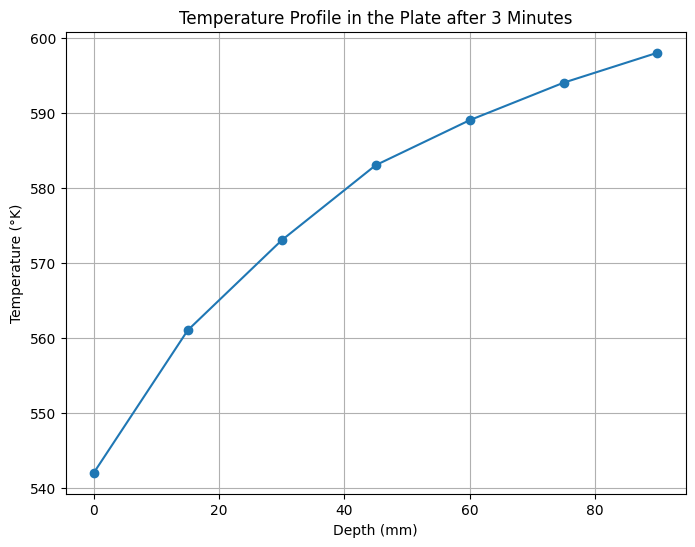

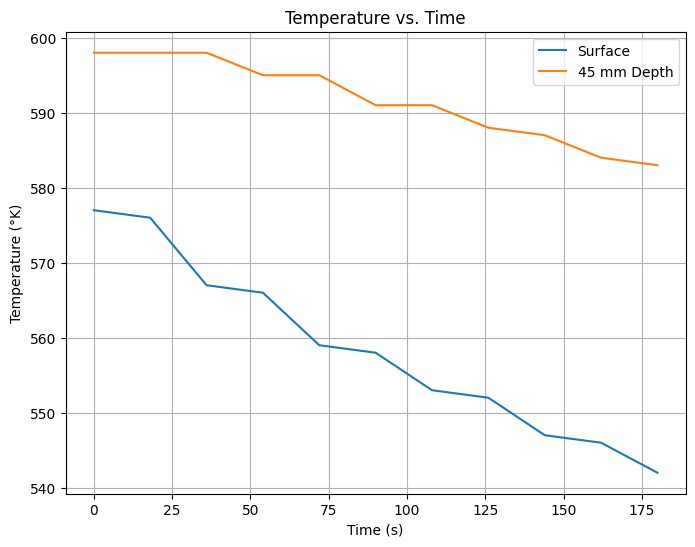

Depth (mm) - Temperature (°K):
0 mm - 542.00 °K
15 mm - 561.00 °K
30 mm - 573.00 °K
45 mm - 583.00 °K
60 mm - 589.00 °K
75 mm - 594.00 °K
90 mm - 598.00 °K

After 3 minutes, temperature at surface is 542.00°K and temperature at depth=45mm is 583.00°K


In [33]:

depths_mm = x_points * 1000  # convert meters to millimeters
temperatures_celsius = T

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(depths_mm, temperatures_celsius, marker='o')
plt.title('Temperature Profile in the Plate after 3 Minutes')
plt.xlabel('Depth (mm)')
plt.ylabel('Temperature (°K)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(times, T_surface_history, label='Surface')
plt.plot(times, T_45mm_history, label='45 mm Depth')
plt.title('Temperature vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°K)')
plt.legend()
plt.grid(True)
plt.show()


print("Depth (mm) - Temperature (°K):")
for depth, temp in zip(depths_mm, temperatures_celsius):
    print(f"{depth:.0f} mm - {temp:.2f} °K")
    
print(f"\nAfter 3 minutes, temperature at surface is {temperatures_celsius[0]:.2f}°K and temperature at depth=45mm is {temperatures_celsius[3]:.2f}°K")
